<a href="https://colab.research.google.com/github/GomathiRajendran/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 👭 👬 👯 **Customer Segmentation Analysis**

### **Customer Segmentation**:
Customer segmentation is the practice of dividing a company's customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

### **Data Explanation**:
* CustomerID - Unique Identification number for the customers
* Gender - Male/Female
* Age - Age of the customer
* Annual Income - Annual Income of the customer in thousand dollars
* Spending Score - Spending score of the customer (1 - 100)

### **Approach**:
Used both Hierarchial and K-Means Clustering

## **Data Description and Exploratory Data Analysis** 📊

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Customer_Segmentation.xlsx', index_col=0)

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# Let's rename the columns for easy usage
df.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}, inplace=True)

In [5]:
df.head()

,Gender,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.shape

(200, 4)

#### It has 200 records and 4 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

#### No missing values

In [9]:
df.duplicated().sum()

0

#### No dupicate records found

### **Univariate Analysis**

In [10]:
df.describe()

,Age,Income,Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
df.describe(include='all')

,Gender,Age,Income,Score
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [12]:
import warnings
warnings.filterwarnings('ignore')

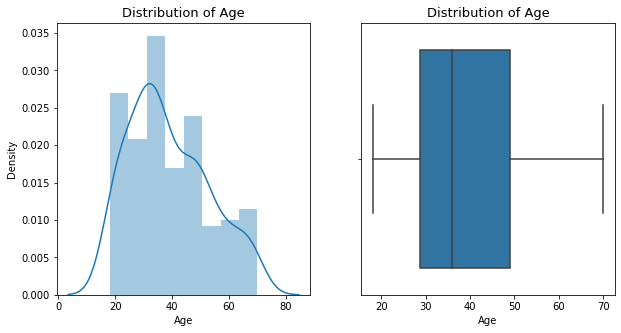

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
a = sns.distplot(df['Age'] , ax=axes[0])
a.set_title("Distribution of Age",fontsize=13)
a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[1])
a.set_title("Distribution of Age",fontsize=13);

In [14]:
from scipy.stats import skew
print("The feature 'Age' has skewness of about",skew(df['Age']))

The feature 'Age' has skewness of about 0.48191947090957177


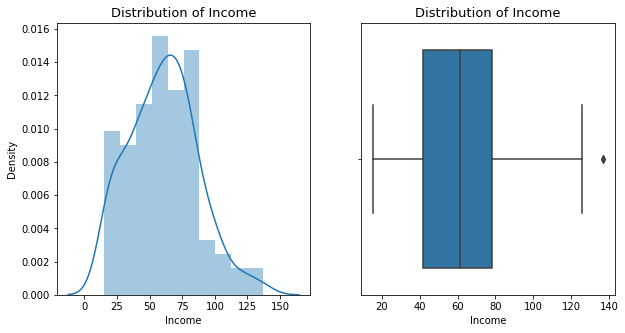

In [15]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
a = sns.distplot(df['Income'] , ax=axes[0])
a.set_title("Distribution of Income",fontsize=13)
a = sns.boxplot(df['Income'] , ax=axes[1])
a.set_title("Distribution of Income",fontsize=13);

In [16]:
print("The feature 'Income' has skewness of about",skew(df['Income']))

The feature 'Income' has skewness of about 0.319423684276314


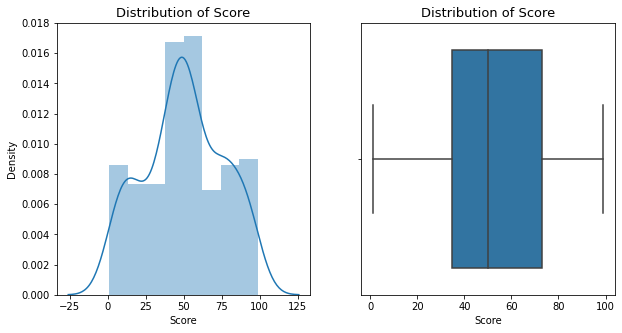

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
a = sns.distplot(df['Score'] , ax=axes[0])
a.set_title("Distribution of Score",fontsize=13)
a = sns.boxplot(df['Score'] , ax=axes[1])
a.set_title("Distribution of Score",fontsize=13);

In [18]:
print("The feature 'Score' has skewness of about",skew(df['Score']))

The feature 'Score' has skewness of about -0.04686530945553505


From the boxplots and distribution plot, we can infer that all the features are skewed (either positively or negatively). Also there are no outliers except for features such as "Income". We don't do any outlier treatment as we gonna anyway scale the data.

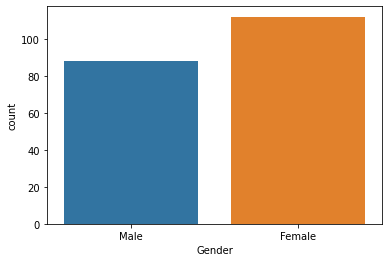

In [19]:
# distribution of categorical variable
sns.countplot(x='Gender', data=df);

In [20]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### **Bivariate and Multivariate Analysis**

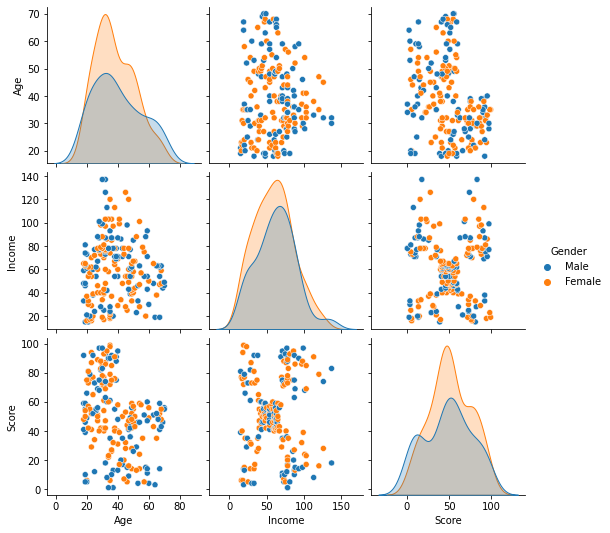

In [21]:
sns.pairplot(data=df,diag_kind='kde', hue='Gender');

In [22]:
df.corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


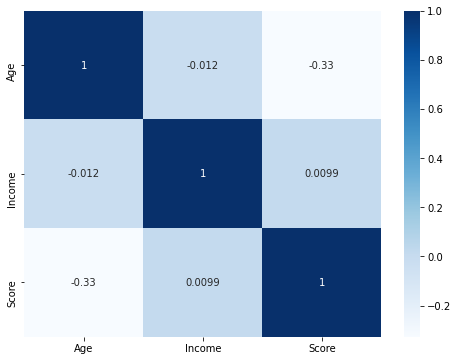

In [23]:
fig,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(),annot=True, cmap="Blues", ax=ax);

### **Feature Engineering**

In [24]:
df = pd.get_dummies(df).reset_index(drop=True)
df.head()

,Age,Income,Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [25]:
df.drop('Gender_Male', axis=1, inplace=True)

In [26]:
df.head()

,Age,Income,Score,Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [27]:
df = df.rename(columns={'Gender_Female':'Gender'})

In [28]:
df.head()

,Age,Income,Score,Gender
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


#### Here Gender = 0 indicates Male and Gender = 1 indicates Female

### **Feature Scaling**

#### Let's scale the data before applying any clustering algorithms

Do we scale discrete/dummy variables along with continuous variables? [Go Here](https://stats.stackexchange.com/questions/463690/multiple-regression-with-mixed-continuous-categorical-variables-dummy-coding-s)

In [29]:
# importing the MinMaxScaler Module
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Creating an object for the StandardScaler function
X = MinMaxScaler()

In [31]:
scaled_df = pd.DataFrame(X.fit_transform(df),columns=df.columns)

In [32]:
scaled_df

,Age,Income,Score,Gender
0,0.019231,0.000000,0.387755,0.0
1,0.057692,0.000000,0.816327,0.0
2,0.038462,0.008197,0.051020,1.0
3,0.096154,0.008197,0.775510,1.0
4,0.250000,0.016393,0.397959,1.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,1.0
196,0.519231,0.909836,0.275510,1.0
197,0.269231,0.909836,0.744898,0.0
198,0.269231,1.000000,0.173469,0.0


In [33]:
scaled_df.describe()

,Age,Income,Score,Gender
count,200.000000,200.000000,200.000000,200.000000
mean,0.400962,0.373443,0.502041,0.560000
std,0.268635,0.215285,0.263505,0.497633
min,0.000000,0.000000,0.000000,0.000000
25%,0.206731,0.217213,0.344388,0.000000
50%,0.346154,0.381148,0.500000,1.000000
75%,0.596154,0.516393,0.734694,1.000000
max,1.000000,1.000000,1.000000,1.000000


### **Hierarchial clustering**

In [34]:
#Importing dendrogram and linkage module
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
link_method = linkage(scaled_df, method = 'ward') # Since, Ward is the most effective method for noisy data.

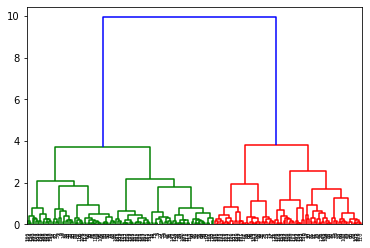

In [36]:
dend = dendrogram(link_method)

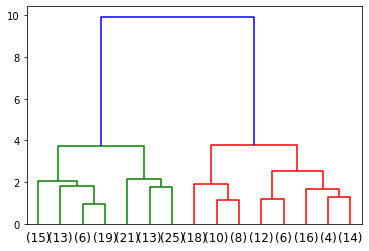

In [37]:
#Cutting the Dendrogram with suitable clusters
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 15)

##### **From the dendrogram, taking the business context into consideration, we can come to a conclusion that we can form 4 clusters**

In [38]:
#Importing fcluster module to create clusters
from scipy.cluster.hierarchy import fcluster

In [39]:
# Setting the criterion as maxclust,then create 4 clusters, and store the result in another object 'clusters'

clusters = fcluster(link_method, 4, criterion='maxclust')
clusters

array([4, 3, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 1, 2, 4, 3, 1, 3, 4, 2, 4, 3,
       1, 3, 1, 3, 1, 4, 1, 2, 4, 2, 4, 3, 1, 2, 1, 2, 1, 2, 1, 3, 4, 2,
       1, 2, 1, 2, 2, 2, 1, 4, 2, 4, 1, 4, 1, 4, 2, 4, 4, 3, 1, 1, 4, 3,
       1, 1, 3, 2, 4, 1, 1, 1, 4, 3, 1, 4, 2, 1, 4, 4, 4, 1, 2, 4, 1, 2,
       2, 1, 1, 3, 4, 2, 2, 3, 1, 2, 4, 3, 2, 1, 4, 3, 4, 2, 1, 4, 4, 4,
       4, 2, 2, 3, 2, 2, 1, 1, 1, 1, 3, 2, 2, 3, 2, 2, 4, 3, 4, 3, 4, 3,
       2, 2, 4, 2, 1, 3, 4, 2, 1, 3, 2, 2, 4, 3, 4, 2, 1, 3, 4, 3, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 1, 3, 4, 3, 4, 3, 1, 2,
       4, 3, 4, 3, 1, 2, 4, 2, 1, 3, 1, 3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3,
       4, 3], dtype=int32)

In [40]:
df['cluster'] = clusters

In [41]:
df.head()

,Age,Income,Score,Gender,cluster
0,19,15,39,0,4
1,21,15,81,0,3
2,20,16,6,1,1
3,23,16,77,1,2
4,31,17,40,1,1


### **K-Means Clustering**

In [44]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

##### Let us find the optimal value of K using Elbow curve and Silhoutte score



In [45]:
wss = []
k = range(1,11)
for i in k:
    KM = KMeans(n_clusters=i,random_state=17)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

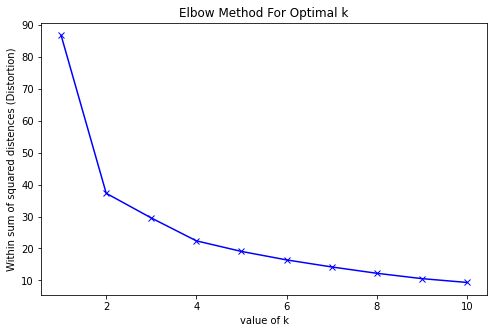

In [46]:
plt.subplots(figsize=(8,5))
plt.plot(k, wss, 'bx-')
plt.xlabel('value of k')
plt.ylabel('Within sum of squared distences (Distortion)')
plt.title('Elbow Method For Optimal k')
plt.show()

**From the elbow curve, we can see that, there is no significant drop in Distortion (within sum of squared distances) after k = 4. So the elbow curve suggests that the optimal value for k is 4. Let us also verify this by silhoutte score by taking k as 2,3,4 and 5**

K=2

In [47]:
k_means = KMeans(n_clusters = 2,random_state=17)
k_means.fit(scaled_df)
labels = k_means.labels_

In [48]:
# Calculating silhouette_score
silhouette_score(scaled_df,labels,random_state=17)

0.5194624832665107

K=3

In [49]:
k_means = KMeans(n_clusters = 3,random_state=17)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels,random_state=17)

0.45835255811254244

K=4

In [50]:
k_means = KMeans(n_clusters = 4,random_state=17)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels,random_state=17)

0.3641657522339062

K=5

In [51]:
k_means = KMeans(n_clusters = 5,random_state=17)
k_means.fit(scaled_df)
labels = k_means.labels_
silhouette_score(scaled_df,labels,random_state=17)

0.3706322619220125

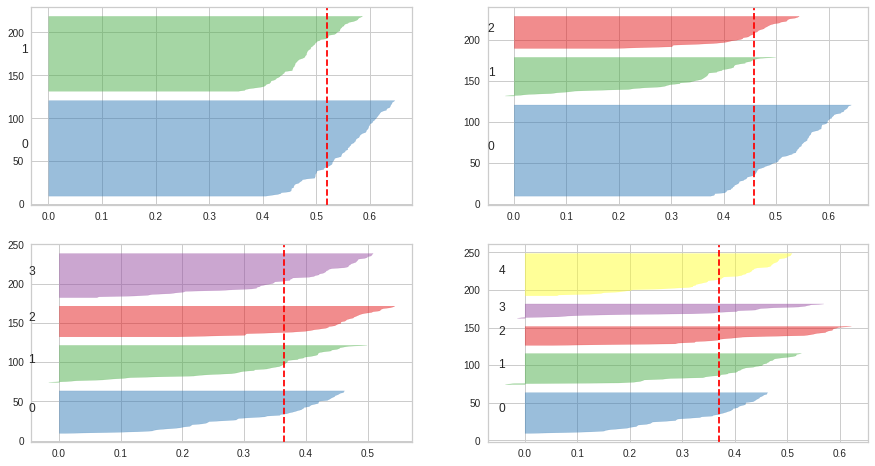

In [52]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=17)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_df)


**From the above plot, it is clear that K=4 clusters is optimal as the silhoutte score of all four clusters lies above the average silhouette score and the thickness of the clusters doesn't fluctuate much.**

#### **CLUSTER PROFILING**

In [53]:
#Cluster Frequency
df.cluster.value_counts().sort_index()

1    53
2    59
3    36
4    52
Name: cluster, dtype: int64

In [54]:
df.groupby('cluster').mean()

,Age,Income,Score,Gender
cluster,,,,
1,48.320755,57.754717,34.547170,1
2,28.915254,60.593220,66.779661,1
3,27.916667,65.027778,73.666667,0
4,48.038462,60.288462,31.096154,0


#### **Cluster Definition:**

Cluster 1: 
* They have lowest average income.
* Their score is also below average.
* Most people having average age of 40 to 60
* These people should be provided with discounts on less costlier things. Gift cards, gift coupons can be provided to hold these customers too
* The shop can approach them by providing EMIs with less or 0% interest for costlier things thus encouraging them to buy things and increase sales.

Cluster 2:
* Their income is higher.
* Their spending score is also above average.
* People of age 20 to 40 are here
* These people should be provided with discounts and offers to increase their spend. A good marketing strategy will also win here.

Cluster 3:
* They earn the most among all 4 clusters
* They spend the most among all 4 clusters
* People of age 20 to 40 are here
* These people should be provided with rewards to appreciate their loyalty. They can be targetted to buy more costlier things

Cluster 4:
* They earn higher(above average) salary
* But they spend the least
* These people are able customers. They can spend much. These customers might not be serviced well. 
* So improving the quality of products and service will definitely attract these customers

------------------------------------------------------------------------------------------------------ ***END***-----------------------------------------------------------------------------------------------------------------